<a href="https://colab.research.google.com/github/Rosma640/tugas20/blob/main/70_30_Skripsi_Analisis_Ulasan_B_Inggris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
import string
import re

In [131]:
!pip install nltk

In [132]:
!pip install swifter

In [133]:
content = pd.read_csv('/content/drive/MyDrive/Skripsi/Ulasan Spotify En.csv')
content.head()

,ulasan,label
0,"Starting in December, the app started crashing...",2
1,"I've loved this app for many years. Lately, ho...",3
2,Spotify is my favorite music streaming app by ...,3
3,It's really annoying when the music doesn't ha...,2
4,"Great library, generally easy to use. Negative...",2


In [134]:
content = content.rename(columns={'ulasan': 'content', 'label': 'score'}) #mengganti nama fitur
content.head()

,content,score
0,"Starting in December, the app started crashing...",2
1,"I've loved this app for many years. Lately, ho...",3
2,Spotify is my favorite music streaming app by ...,3
3,It's really annoying when the music doesn't ha...,2
4,"Great library, generally easy to use. Negative...",2


In [135]:
content.to_csv("Ulasan Spotify En.csv")

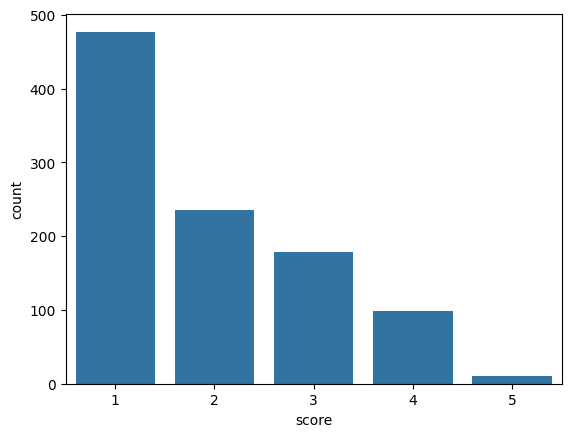

In [136]:
import seaborn as sns
sns.countplot(x='score', data=content);

In [137]:
print(f"Jumlah data {len(content)}")
print(f"rating 1 = {len(content[content['score']==1])}")
print(f"rating 2 = {len(content[content['score']==2])}")
print(f"rating 3 = {len(content[content['score']==3])}")
print(f"rating 4 = {len(content[content['score']==4])}")
print(f"rating 5 = {len(content[content['score']==5])}")

Jumlah data 1000
rating 1 = 477
rating 2 = 236
rating 3 = 178
rating 4 = 98
rating 5 = 11


In [138]:
# Pelabelan data ulasan
def pelabelan(score):
  if score < 4:
    return 'Negatif'
  elif score > 3 :
    return 'Positif'
content['Label'] = content ['score'].apply(pelabelan)
content.head()

,content,score,Label
0,"Starting in December, the app started crashing...",2,Negatif
1,"I've loved this app for many years. Lately, ho...",3,Negatif
2,Spotify is my favorite music streaming app by ...,3,Negatif
3,It's really annoying when the music doesn't ha...,2,Negatif
4,"Great library, generally easy to use. Negative...",2,Negatif


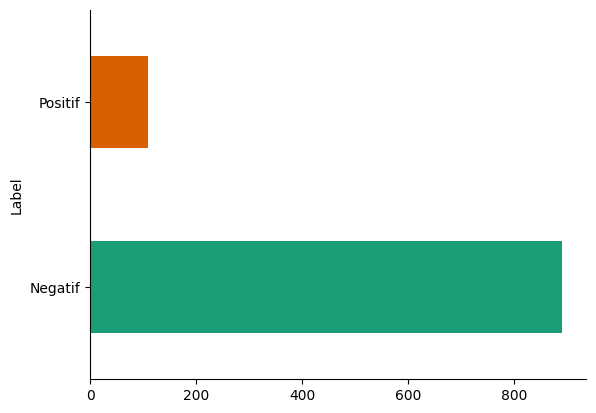

In [139]:
# @title Label

from matplotlib import pyplot as plt
import seaborn as sns
content.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [140]:
content.to_csv("Hasil Labeling Inggris.csv")

# **Presentase sentimen**

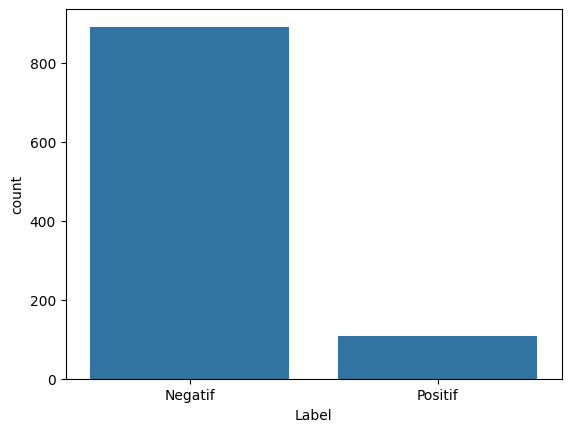

In [141]:
import seaborn as sns
sns.countplot(x='Label', data=content);

In [142]:
# Menghitung jumlah masing-masing label
label_counts = content['Label'].value_counts()

# Menampilkan jumlah label
print(label_counts)

Label
Negatif    891
Positif    109
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7dc9602341c0>,
 [Text(-0.18382429810911283, -1.0845315244033675, 'Negatif'),
  Text(0.18382439965028166, 1.08453150719249, 'Positif')],
 [Text(-0.10026779896860698, -0.5915626496745641, '89.1%'),
  Text(0.10026785435469908, 0.5915626402868126, '10.9%')])

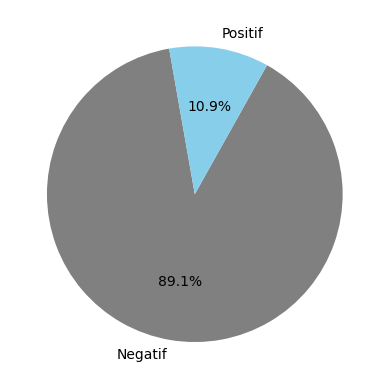

In [143]:
labels = ['Negatif', 'Positif']
sizes = [891, 109]
colors = ['grey', 'skyblue']

plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', startangle=100)

# **Analisis Data**

In [144]:
!pip install emoji

In [145]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [146]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Preprocessing**

**Case Folding**

In [147]:
def casefolding(content):
  content = content.lower()
  return content
content['CaseFolding']= content['content'].apply(casefolding)
print('Case Folding : \n')
print(content['CaseFolding'].head())
print('\n\n\n')

Case Folding : 

0    starting in december, the app started crashing...
1    i've loved this app for many years. lately, ho...
2    spotify is my favorite music streaming app by ...
3    it's really annoying when the music doesn't ha...
4    great library, generally easy to use. negative...
Name: CaseFolding, dtype: object






In [148]:
content.head()

,content,score,Label,CaseFolding
0,"Starting in December, the app started crashing...",2,Negatif,"starting in december, the app started crashing..."
1,"I've loved this app for many years. Lately, ho...",3,Negatif,"i've loved this app for many years. lately, ho..."
2,Spotify is my favorite music streaming app by ...,3,Negatif,spotify is my favorite music streaming app by ...
3,It's really annoying when the music doesn't ha...,2,Negatif,it's really annoying when the music doesn't ha...
4,"Great library, generally easy to use. Negative...",2,Negatif,"great library, generally easy to use. negative..."


In [149]:
content.to_csv("Hasil_Case Folding.csv")

**Cleaning**

In [150]:
import re
import emoji

def cleaning(content):
  content = re.sub(r'@[A-Za-a0-9]+',' ',content)
  content = re.sub(r'#[A-Za-z0-9]+',' ',content)
  content = re.sub(r"http\S+",' ',content)
  content = re.sub(r'[0-9]+',' ',content)
  content = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", content)
  content = content.strip(' ')
  return content
content['Cleaning']= content['CaseFolding'].apply(cleaning)

def Emoji(content):
    return content.encode('ascii', 'ignore').decode('ascii')
content['Cleaning']= content['Cleaning'].apply(Emoji)

def replace(content):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', content)
content['Cleaning']= content['Cleaning'].apply(replace)

print('Cleaning: \n')
print(content['Cleaning'].head())
print('\n\n\n')


Cleaning: 

0    starting in december  the app started crashing...
1    i ve loved this app for many years  lately  ho...
2    spotify is my favorite music streaming app by ...
3    it s really annoying when the music doesn t ha...
4    great library  generally easy to use  negative...
Name: Cleaning, dtype: object






In [151]:
content.head()

,content,score,Label,CaseFolding,Cleaning
0,"Starting in December, the app started crashing...",2,Negatif,"starting in december, the app started crashing...",starting in december the app started crashing...
1,"I've loved this app for many years. Lately, ho...",3,Negatif,"i've loved this app for many years. lately, ho...",i ve loved this app for many years lately ho...
2,Spotify is my favorite music streaming app by ...,3,Negatif,spotify is my favorite music streaming app by ...,spotify is my favorite music streaming app by ...
3,It's really annoying when the music doesn't ha...,2,Negatif,it's really annoying when the music doesn't ha...,it s really annoying when the music doesn t ha...
4,"Great library, generally easy to use. Negative...",2,Negatif,"great library, generally easy to use. negative...",great library generally easy to use negative...


In [152]:
content.to_csv("Hasil Cleaning.csv")

**Tokenizing**

In [153]:
import nltk
from nltk.tokenize import word_tokenize
def tokenizing(content):
  content = word_tokenize(content)
  return content
content['Tokenizing']= content['Cleaning'].apply(tokenizing)
print('Tokenizing : \n')
print(content['Tokenizing'].head())
print('\n\n\n')

Tokenizing : 

0    [starting, in, december, the, app, started, cr...
1    [i, ve, loved, this, app, for, many, years, la...
2    [spotify, is, my, favorite, music, streaming, ...
3    [it, s, really, annoying, when, the, music, do...
4    [great, library, generally, easy, to, use, neg...
Name: Tokenizing, dtype: object






In [154]:
content .head()

,content,score,Label,CaseFolding,Cleaning,Tokenizing
0,"Starting in December, the app started crashing...",2,Negatif,"starting in december, the app started crashing...",starting in december the app started crashing...,"[starting, in, december, the, app, started, cr..."
1,"I've loved this app for many years. Lately, ho...",3,Negatif,"i've loved this app for many years. lately, ho...",i ve loved this app for many years lately ho...,"[i, ve, loved, this, app, for, many, years, la..."
2,Spotify is my favorite music streaming app by ...,3,Negatif,spotify is my favorite music streaming app by ...,spotify is my favorite music streaming app by ...,"[spotify, is, my, favorite, music, streaming, ..."
3,It's really annoying when the music doesn't ha...,2,Negatif,it's really annoying when the music doesn't ha...,it s really annoying when the music doesn t ha...,"[it, s, really, annoying, when, the, music, do..."
4,"Great library, generally easy to use. Negative...",2,Negatif,"great library, generally easy to use. negative...",great library generally easy to use negative...,"[great, library, generally, easy, to, use, neg..."


In [155]:
content.to_csv("Hasil Tokenizing.csv")

**Stopword Removal**

In [156]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

daftar_stopword = stopwords.words('english')

def stopwordText(words):
 return [word for word in words if word not in daftar_stopword]

content['Stopword Removal'] = content['Tokenizing'].apply(stopwordText)
print('Stopword Removal: \n')
print(content['Stopword Removal'].head())
print('\n\n\n')

Stopword Removal: 

0    [starting, december, app, started, crashing, u...
1    [loved, app, many, years, lately, however, son...
2    [spotify, favorite, music, streaming, app, lan...
3    [really, annoying, music, lyrics, like, %, tim...
4    [great, library, generally, easy, use, negativ...
Name: Stopword Removal, dtype: object






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [157]:
content .head()

,content,score,Label,CaseFolding,Cleaning,Tokenizing,Stopword Removal
0,"Starting in December, the app started crashing...",2,Negatif,"starting in december, the app started crashing...",starting in december the app started crashing...,"[starting, in, december, the, app, started, cr...","[starting, december, app, started, crashing, u..."
1,"I've loved this app for many years. Lately, ho...",3,Negatif,"i've loved this app for many years. lately, ho...",i ve loved this app for many years lately ho...,"[i, ve, loved, this, app, for, many, years, la...","[loved, app, many, years, lately, however, son..."
2,Spotify is my favorite music streaming app by ...,3,Negatif,spotify is my favorite music streaming app by ...,spotify is my favorite music streaming app by ...,"[spotify, is, my, favorite, music, streaming, ...","[spotify, favorite, music, streaming, app, lan..."
3,It's really annoying when the music doesn't ha...,2,Negatif,it's really annoying when the music doesn't ha...,it s really annoying when the music doesn t ha...,"[it, s, really, annoying, when, the, music, do...","[really, annoying, music, lyrics, like, %, tim..."
4,"Great library, generally easy to use. Negative...",2,Negatif,"great library, generally easy to use. negative...",great library generally easy to use negative...,"[great, library, generally, easy, to, use, neg...","[great, library, generally, easy, use, negativ..."


In [158]:
content.to_csv('Stopword Removal.csv')

**Stemming**

In [159]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd

stemmer = PorterStemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in content['Stopword Removal']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

def stemmingText(document):
    return [term_dict[term] for term in document]

content['Stemming'] = content['Stopword Removal'].apply(stemmingText)


starting : start
december : decemb
app : app
started : start
crashing : crash
used : use
background : background
triple : tripl
checked : check
settings : set
% : %
issue : issu
big : big
problem : problem
listening : listen
whole : whole
point : point
listen : listen
music : music
going : go
staring : stare
time : time
frustrating : frustrat
using : use
youtube : youtub
scrolling : scroll
functionality : function
weird : weird
also : also
changed : chang
heart : heart
like : like
icon : icon
plus : plu
sign : sign
intuitive : intuit
updated : updat
issues : issu
loved : love
many : mani
years : year
lately : late
however : howev
songs : song
playlists : playlist
switch : switch
places : place
specifically : specif
song : song
middle : middl
first : first
bulk : bulk
specific : specif
order : order
artist : artist
complete : complet
chronological : chronolog
discography : discographi
usually : usual
presents : present
significant : signific
furthermore : furthermor
integrate : integr
p

In [160]:
content.head()

,content,score,Label,CaseFolding,Cleaning,Tokenizing,Stopword Removal,Stemming
0,"Starting in December, the app started crashing...",2,Negatif,"starting in december, the app started crashing...",starting in december the app started crashing...,"[starting, in, december, the, app, started, cr...","[starting, december, app, started, crashing, u...","[start, decemb, app, start, crash, use, backgr..."
1,"I've loved this app for many years. Lately, ho...",3,Negatif,"i've loved this app for many years. lately, ho...",i ve loved this app for many years lately ho...,"[i, ve, loved, this, app, for, many, years, la...","[loved, app, many, years, lately, however, son...","[love, app, mani, year, late, howev, song, pla..."
2,Spotify is my favorite music streaming app by ...,3,Negatif,spotify is my favorite music streaming app by ...,spotify is my favorite music streaming app by ...,"[spotify, is, my, favorite, music, streaming, ...","[spotify, favorite, music, streaming, app, lan...","[spotifi, favorit, music, stream, app, landsli..."
3,It's really annoying when the music doesn't ha...,2,Negatif,it's really annoying when the music doesn't ha...,it s really annoying when the music doesn t ha...,"[it, s, really, annoying, when, the, music, do...","[really, annoying, music, lyrics, like, %, tim...","[realli, annoy, music, lyric, like, %, time, l..."
4,"Great library, generally easy to use. Negative...",2,Negatif,"great library, generally easy to use. negative...",great library generally easy to use negative...,"[great, library, generally, easy, to, use, neg...","[great, library, generally, easy, use, negativ...","[great, librari, gener, easi, use, neg, search..."


In [161]:
content.to_csv("hasil_stemming.csv")

In [162]:
def join_text_list(texts):
    return ' '.join(texts)

content["dataset_join"] = content["Stemming"].apply(join_text_list)

content["dataset_join"].head()

0    start decemb app start crash use background tr...
1    love app mani year late howev song playlist sw...
2    spotifi favorit music stream app landslid ipho...
3    realli annoy music lyric like % time lyric fre...
4    great librari gener easi use neg search featur...
Name: dataset_join, dtype: object

In [163]:
content.head()

,content,score,Label,CaseFolding,Cleaning,Tokenizing,Stopword Removal,Stemming,dataset_join
0,"Starting in December, the app started crashing...",2,Negatif,"starting in december, the app started crashing...",starting in december the app started crashing...,"[starting, in, december, the, app, started, cr...","[starting, december, app, started, crashing, u...","[start, decemb, app, start, crash, use, backgr...",start decemb app start crash use background tr...
1,"I've loved this app for many years. Lately, ho...",3,Negatif,"i've loved this app for many years. lately, ho...",i ve loved this app for many years lately ho...,"[i, ve, loved, this, app, for, many, years, la...","[loved, app, many, years, lately, however, son...","[love, app, mani, year, late, howev, song, pla...",love app mani year late howev song playlist sw...
2,Spotify is my favorite music streaming app by ...,3,Negatif,spotify is my favorite music streaming app by ...,spotify is my favorite music streaming app by ...,"[spotify, is, my, favorite, music, streaming, ...","[spotify, favorite, music, streaming, app, lan...","[spotifi, favorit, music, stream, app, landsli...",spotifi favorit music stream app landslid ipho...
3,It's really annoying when the music doesn't ha...,2,Negatif,it's really annoying when the music doesn't ha...,it s really annoying when the music doesn t ha...,"[it, s, really, annoying, when, the, music, do...","[really, annoying, music, lyrics, like, %, tim...","[realli, annoy, music, lyric, like, %, time, l...",realli annoy music lyric like % time lyric fre...
4,"Great library, generally easy to use. Negative...",2,Negatif,"great library, generally easy to use. negative...",great library generally easy to use negative...,"[great, library, generally, easy, to, use, neg...","[great, library, generally, easy, use, negativ...","[great, librari, gener, easi, use, neg, search...",great librari gener easi use neg search featur...


In [164]:
content.to_csv("hasil preprocessing.csv")

# **Wordcloud**

In [165]:
from wordcloud import WordCloud

In [166]:
df_negative = content[ (content['score']==1) | (content['score']==2) | (content['score']==3)]
df_positive = content[ (content['score']==4) | (content['score']==5)]
#convert to list
negative_list= df_negative['dataset_join'].tolist()
positive_list= df_positive['dataset_join'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

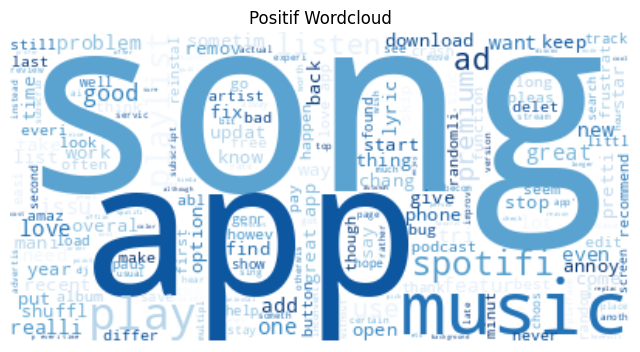

In [167]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Blues").generate(filtered_positive)
plt.figure(figsize=[8,6])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positif Wordcloud")
plt.show()

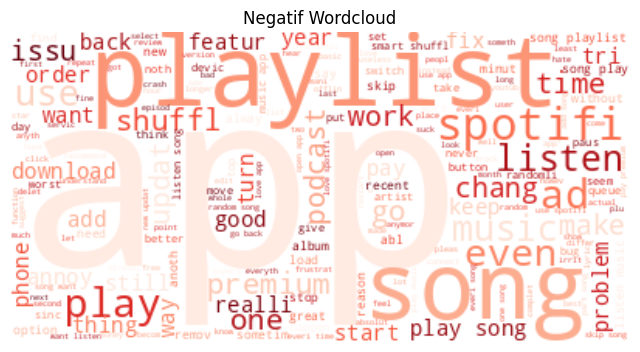

In [168]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[8,6])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negatif Wordcloud")
plt.show()

# **Analisis Data**

In [169]:
!pip install imblearn

In [170]:
import pandas as pd
import pickle
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
# Extract features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(content['dataset_join'])
y = content['Label']

In [172]:
# Convert the vectorized words to a DataFrame
vectorized_words_df = pd.DataFrame(X.toarray())

# Concatenate the vectorized words DataFrame with the original dataset
dataset_with_vectors = pd.concat([content, vectorized_words_df], axis=1)

In [173]:
# Print the dataset with vectorized words
dataset_with_vectors

,content,score,Label,CaseFolding,Cleaning,Tokenizing,Stopword Removal,Stemming,dataset_join,0,...,990,991,992,993,994,995,996,997,998,999
0,"Starting in December, the app started crashing...",2,Negatif,"starting in december, the app started crashing...",starting in december the app started crashing...,"[starting, in, december, the, app, started, cr...","[starting, december, app, started, crashing, u...","[start, decemb, app, start, crash, use, backgr...",start decemb app start crash use background tr...,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.141606,0.0,0.00000
1,"I've loved this app for many years. Lately, ho...",3,Negatif,"i've loved this app for many years. lately, ho...",i ve loved this app for many years lately ho...,"[i, ve, loved, this, app, for, many, years, la...","[loved, app, many, years, lately, however, son...","[love, app, mani, year, late, howev, song, pla...",love app mani year late howev song playlist sw...,0.0,...,0.0,0.0,0.0,0.0,0.115388,0.0,0.0,0.000000,0.0,0.00000
2,Spotify is my favorite music streaming app by ...,3,Negatif,spotify is my favorite music streaming app by ...,spotify is my favorite music streaming app by ...,"[spotify, is, my, favorite, music, streaming, ...","[spotify, favorite, music, streaming, app, lan...","[spotifi, favorit, music, stream, app, landsli...",spotifi favorit music stream app landslid ipho...,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
3,It's really annoying when the music doesn't ha...,2,Negatif,it's really annoying when the music doesn't ha...,it s really annoying when the music doesn t ha...,"[it, s, really, annoying, when, the, music, do...","[really, annoying, music, lyrics, like, %, tim...","[realli, annoy, music, lyric, like, %, time, l...",realli annoy music lyric like % time lyric fre...,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
4,"Great library, generally easy to use. Negative...",2,Negatif,"great library, generally easy to use. negative...",great library generally easy to use negative...,"[great, library, generally, easy, to, use, neg...","[great, library, generally, easy, use, negativ...","[great, librari, gener, easi, use, neg, search...",great librari gener easi use neg search featur...,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.165732,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Spotify was my favorite music app...but now it...,1,Negatif,spotify was my favorite music app...but now it...,spotify was my favorite music app but now it i...,"[spotify, was, my, favorite, music, app, but, ...","[spotify, favorite, music, app, disaster, usef...","[spotifi, favorit, music, app, disast, use, an...",spotifi favorit music app disast use anymor li...,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
996,I am really disappointed with the latest updat...,1,Negatif,i am really disappointed with the latest updat...,i am really disappointed with the latest updat...,"[i, am, really, disappointed, with, the, lates...","[really, disappointed, latest, update, copied,...","[realli, disappoint, latest, updat, copi, play...",realli disappoint latest updat copi playlist a...,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
997,Giving one star because there is no option for...,1,Negatif,giving one star because there is no option for...,giving one star because there is no option for...,"[giving, one, star, because, there, is, no, op...","[giving, one, star, option, zero, using, spoti...","[give, one, star, option, zero, use, spotifi, ...",give one star option zero use spotifi year sin...,0.0,...,0.0,0.0,0.0,0.0,0.132387,0.0,0.0,0.000000,0.0,0.27712
998,"After the new update, Spotify literally became...",1,Negatif,"after the new update, spotify literally became...",after the new update spotify literally became...,"[after, the, new, update, spotify, literally, ...","[new, update, spotify, literally, became, one,...","[new, updat, spotifi, liter, becam, one, worst...

In [174]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# saving
with open('vectorizer.pickle', 'wb') as handle:
    pickle.dump(dataset_with_vectors, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('vectorizer.pickle', 'rb') as handle:
    vectorizer = pickle.load(handle)

In [226]:
from joblib import dump
dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

# ***Sampling***

In [176]:
# Random oversampling
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

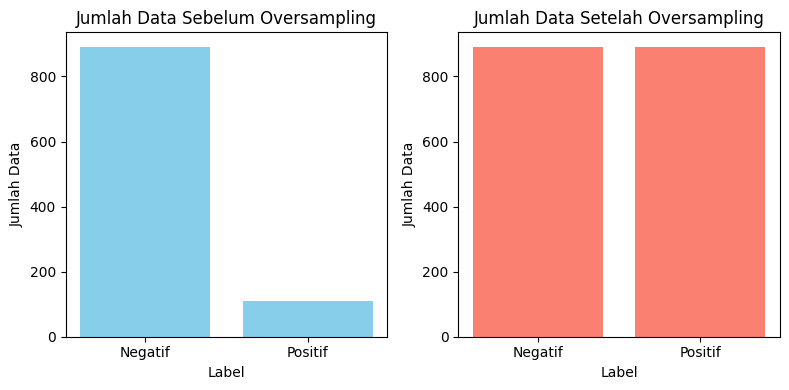

In [228]:
# Random oversampling
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X, y)

# Membuat dataframe untuk label y sebelum dan setelah oversampling
data_before = pd.Series(y).value_counts()
data_after = pd.Series(y_train_resampled).value_counts()

# Plot diagram batang
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.bar(data_before.index, data_before.values, color='skyblue')
plt.title('Jumlah Data Sebelum Oversampling')
plt.xlabel('Label')
plt.ylabel('Jumlah Data')

plt.subplot(1, 2, 2)
plt.bar(data_after.index, data_after.values, color='salmon')
plt.title('Jumlah Data Setelah Oversampling')
plt.xlabel('Label')
plt.ylabel('Jumlah Data')

plt.tight_layout()
plt.show()

In [229]:
# Menampilkan jumlah data sebelum oversampling
print("Jumlah data sebelum oversampling:")
print(pd.Series(y).value_counts())

# Menampilkan jumlah data setelah oversampling
print("Jumlah data setelah oversampling:")
print(pd.Series(y_train_resampled).value_counts())


Jumlah data sebelum oversampling:
Label
Negatif    891
Positif    109
Name: count, dtype: int64
Jumlah data setelah oversampling:
Label
Negatif    891
Positif    891
Name: count, dtype: int64


In [230]:
y_train_resampled

0       Negatif
1       Negatif
2       Negatif
3       Negatif
4       Negatif
         ...   
1777    Positif
1778    Positif
1779    Positif
1780    Positif
1781    Positif
Name: Label, Length: 1782, dtype: object

In [231]:
X_train_resampled

<1782x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 53399 stored elements in Compressed Sparse Row format>

In [514]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

In [541]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

# ***Train Data***

In [542]:
# Make predictions on the train data
y_pred = rf_model.predict(X_train)

# Display classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

     Negatif       0.97      0.98      0.98       641
     Positif       0.98      0.97      0.98       606

    accuracy                           0.98      1247
   macro avg       0.98      0.98      0.98      1247
weighted avg       0.98      0.98      0.98      1247



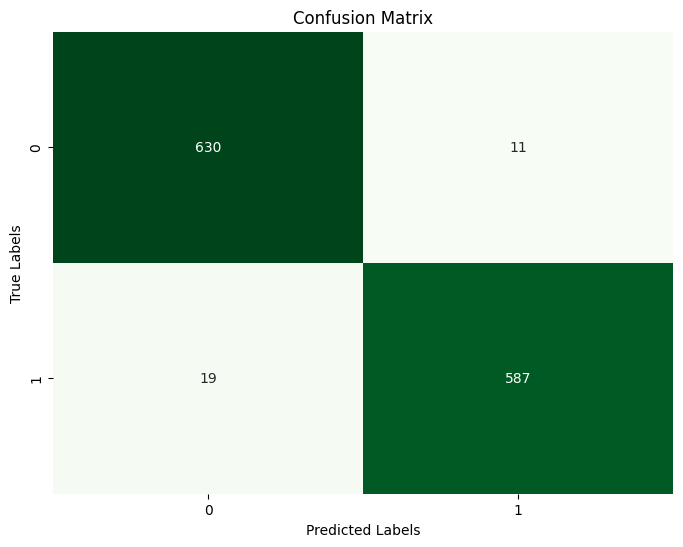

              precision    recall  f1-score   support

     Negatif       0.97      0.98      0.98       641
     Positif       0.98      0.97      0.98       606

    accuracy                           0.98      1247
   macro avg       0.98      0.98      0.98      1247
weighted avg       0.98      0.98      0.98      1247

Accuracy: 0.9759422614274258


In [543]:
# Create a confusion matrix
confusion = confusion_matrix(y_train, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate evaluation metrics
report = classification_report(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)

print(report)
print("Accuracy:", accuracy)

# ***Test Data***

In [544]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Negatif       0.93      0.93      0.93       250
     Positif       0.94      0.94      0.94       285

    accuracy                           0.93       535
   macro avg       0.93      0.93      0.93       535
weighted avg       0.93      0.93      0.93       535



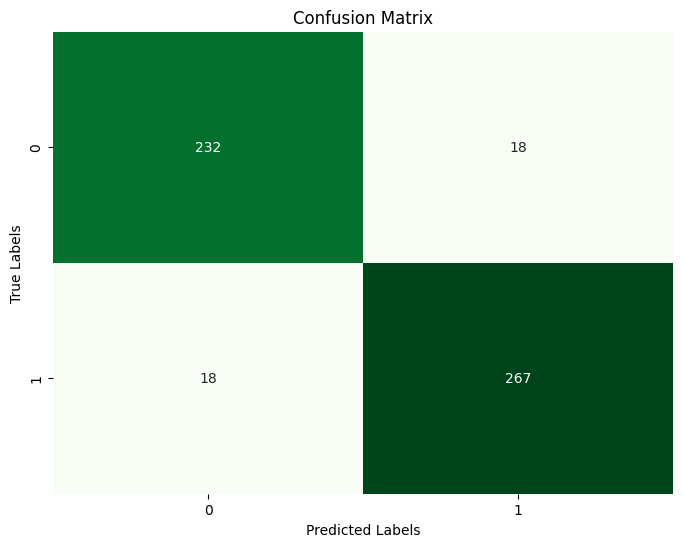

              precision    recall  f1-score   support

     Negatif       0.93      0.93      0.93       250
     Positif       0.94      0.94      0.94       285

    accuracy                           0.93       535
   macro avg       0.93      0.93      0.93       535
weighted avg       0.93      0.93      0.93       535

Accuracy: 0.9327102803738317


In [545]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate evaluation metrics
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(report)
print("Accuracy:", accuracy)

In [546]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[232  18]
 [ 18 267]]


In [547]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9327102803738317
Precision: 0.9327102803738317
Recall: 0.9327102803738317
F1 Score: 0.9327102803738317


In [548]:
import pickle

# Simpan model ke file pkl
with open('model_rf2.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Memanggil model dari file pkl
with open('model_rf2.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [549]:
from joblib import dump
dump(rf_model, 'rf_model2.joblib')

['rf_model2.joblib']

In [550]:
# Melakukan prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.9327102803738317


In [551]:
# Save the dataset with vectorized words as a CSV file
dataset_with_vectors.to_csv('/content/dataset_vectors2.csv', index=False)

In [552]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Melakukan 5-fold cross-validation pada data pelatihan
cv_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5)

# Menampilkan hasil cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

rf_model.fit(X_train_resampled, y_train_resampled)

# Mengevaluasi model pada data testing
test_score = rf_model.score(X_test, y_test)
print("Test set score:", test_score)

Cross-validation scores: [0.91316527 0.93277311 0.93258427 0.92696629 0.95224719]
Mean cross-validation score: 0.9315472256318259
Test set score: 0.9532710280373832
